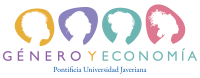



## **Sesión 3:  Nociones básicas de la Gran Encuesta Integrada de Hogares (GEIH) y   uso de datos de la GEIH referentes a cuidado**
---
Autor: Linda Nataly Corredor Martínez. Asistente de investigación Proyecto Género y Economía (https://generoyeconomia.org).

---


**Contenido de la sesión:**
*  Repaso de estructuras de control y librería pandas.
1. El método merge de pandas.
2. Construcción de base de datos de un mes en GEIH.
3. Limpieza de datos.
4. Creación de variables de Cuidado.
5. Algunas estadísticas descriptivas.

Nota: El material relacionado con esta sesión se encuentra en la página del curso: https://generoyeconomia.github.io/python_economia_cuidado/index.html  , en la sección Módulo 3.

## **Descarga de los datos**

`gdown` es una herramienta de línea de comandos que permite descargar archivos desde Google Drive directamente en la línea de comandos.

**Sintaxis:**

`!gdown --id [ID_DEL_ARCHIVO]`

*  [ID_DEL_ARCHIVO] es el identificador único del archivo que deseas descargar desde Google Drive. Este identificador se puede encontrar en la URL del archivo compartido en Google Drive.


In [ ]:
# Descarga la carpet geih_2024 utilizando gdown
!gdown --id 1iKEuW-cqF1h9scmM3Mmbcb6UnQ0ZrsNI

In [ ]:
# Descomprime el archivo geih_2024.zip
!unzip geih_2024

## **Importando Librerías**



In [ ]:
import glob           # Para utilizar patrones de búsqueda de archivos
import os             # Para interactuar con el sistema operativo
import pandas as pd   # Para el manejo de datos en DataFrames

## **2.Construcción de base de datos de un mes en GEIH.**

Los microdatos que se van a usar en esta sesión se ecuentran disponibles en el siguiente link: https://microdatos.dane.gov.co/index.php/catalog/819/get-microdata

A continuación, se presentan las bases de datos disponibles por mes, en los microdatos de la Gran Encuesta Integrada de Hogares. Estas bases de datos ofrecen información sobre la fuerza laboral (empleo, desempleo e inactividad) y otras variables demográficas (sexo, edad, estado civil, educación, etc.). También abarca ingresos familiares, características de vivienda, acceso a servicios y programas, sistema de protección social y calidad del empleo.

**pseudocódigo**

**1. Definir capítulos principales**

* Caracteristicas generales, seguridad social en salud y educación
* Ocupados
* Fuerza de trabajo
* No ocupados
* Otras formas de trabajo
* Migración
* Otros ingresos e impuestos
* Datos del hogar y la vivienda

**2. Importar módulos**
Tomamos cada una de las bases de datos realacionadas con los capítulos y las importamos, cargándolas como DataFrame.

**3. Realizar fusión o unión de los capítulos**
La GEIH proporciona datos tanto a nivel de hogar como a nivel individual (persona). Para poder combinar estos datos, generalmente se usan identificadores comunes en ambas bases de datos.
Antes de fusionar las bases de datos, es importante identificar las variables clave que se utilizarán como identificadores comunes. Estas variables deben ser únicas y estar presentes en ambas bases de datos para poder realizar la fusión de manera efectiva.

Las bases de datos de hogares y personas suelen tener identificadores comunes que permiten emparejar las observaciones. En la GEIH, estos identificadores suelen ser:


*  **DIRECTORIO:** Identificador de la vivienda.
*  **SECUENCIA_P:** Identificador del hogar.
*  **ORDEN:** Número de la persona en el  hogar.

**4. Realizar el anterior proceso de unión por cada mes y luego llevar a cabo un Append de los meses, si se quiere la base por año (Este ejercicio es adicional).**

**5. Verificar y contrastar la unión de los datos.**


**Funciones**

In [ ]:
#Definiendo función para cargar el archivo csv
def load_csv(path):
    """
    Carga un archivo CSV desde la ruta especificada y devuelve el nombre del
    archivo (sin extensión) y su contenido en un DataFrame.

    Parámetros:
    path (str): La ruta al archivo CSV que se desea cargar.

    Retornos:
    tuple: Una tupla que contiene:
        - name (str): El nombre del archivo sin la extensión ".CSV".
        - df_load (pd.DataFrame): El contenido del archivo CSV en un DataFrame de pandas.
    """

    # Obtener el nombre del archivo sin la extensión ".CSV" a partir de la ruta
    name = os.path.split(path)[1].replace(".CSV", "")

    # Leer el archivo CSV y almacenarlo en un DataFrame
    df_load = pd.read_csv(path, sep=";", encoding='unicode_escape', low_memory=False)

    return name, df_load

In [ ]:
# Creación del diccionario que contiene los dataframes
def create_dict_df(paths):
    """
    Crea un diccionario donde las claves son los nombres de los archivos CSV
    (sin extensión) y los valores son los DataFrames que contienen los datos
    de los archivos CSV correspondientes.

    Parámetros:
    paths (list): Una lista de rutas a archivos CSV.

    Retornos:
    dict: Un diccionario donde las claves son los nombres de los archivos CSV
          (sin extensión) y los valores son los DataFrames que contienen los
          datos de los archivos CSV correspondientes.
    """

    # Inicializar un diccionario vacío para almacenar los DataFrames
    dict_data = {}

    # Iterar sobre cada ruta de archivo en la lista de rutas
    for module in paths:
        # Obtener el nombre del archivo y cargar los datos del CSV
        name, load_data = load_csv(module)

        # Agregar el DataFrame al diccionario usando el nombre del archivo como clave
        dict_data[name] = load_data

    # Retornar el diccionario creado
    return dict_data

**Definición de directorios**

In [ ]:
#Directorio de datos originales
sources_path = '/content/geih_2024/sources_marzo'
#Directorio de datos procesados
path_data_final = '/content/geih_2024/final_marzo'

print(f'Path de data original:{sources_path}, Path data procesada:{path_data_final}')

In [ ]:
# Listamos los archivos que se encuentran en la carpeta sources_path
paths = glob.glob(sources_path + '/*')
paths

In [ ]:
# Miramos si las funciones se construyeron bien y se evalúan.
print(create_dict_df(paths))

**Evaluación de las funciones: Guardando diccionario de DataFrames**

In [ ]:
# Evaluación de la función create_dict_df(paths)
dict_data = create_dict_df(paths)

# Imprimir las claves del diccionario
print(dict_data.keys())

**Unión (merge) de las bases de datos que se encuentra en el diccionario** `dict_data`

In [ ]:
# DataFrame principal
data = dict_data['Características generales, seguridad social en salud y educación']

# Lista de categorías a fusionar en el DataFrame 'data'
orther = ['No ocupados', 'Fuerza de trabajo', 'Migración','Ocupados', 'Otras formas de trabajo', 'Otros ingresos e impuestos']

# Fusionando los DataFrames correspondientes a las categorías en 'orther' con el DataFrame 'data'
for file_data in orther:
    data = pd.merge(data, dict_data[file_data], on=["DIRECTORIO", "SECUENCIA_P", "ORDEN"], how="left", validate="1:1", suffixes=(None,"_x"))

# Fusionando el DataFrame 'data' con los datos del hogar y la vivienda
data = pd.merge(data, dict_data['Datos del hogar y la vivienda'], on=["DIRECTORIO", "SECUENCIA_P"], how="left", validate="m:1", suffixes=(None,"_x"))

# Eliminando las columnas duplicadas que resultaron de las fusiones
columns_delete = [i for i in data.columns if "_x" in i]
data.drop(columns=columns_delete, inplace=True)

# Convirtiendo los nombres de las columnas a minúsculas y renombrando las columnas en el DataFrame 'data'
lower_columns = [i.lower() for i in data.columns]
rename_dict = dict(zip(data.columns, lower_columns))
data.rename(columns=rename_dict, inplace=True)

# Imprimiendo la primeras filas de la base de datos final
data.head()

**Guardando el Dataframe unido en la carpeta de paths final.**

In [ ]:
# Definiendo la ruta de salida del archivo CSV en la carpeta final en Drive
path_out = os.path.join(path_data_final,'marzo' +'.csv')

# Creando un registro del camino de salida para referencia
log_out = f'Carpeta de salida  = {path_out}'

# Guardando el DataFrame en un archivo CSV en la ruta de salida, sin incluir el índice
data.to_csv(path_out, index=False)

# Imprimiendo la ruta de salida
print(log_out)

##**Comprobando que el DataFrame esté bien construido**

Las cifras de mercado laboral que se presentan en la siguiente celda de código: se comparan con el anexo de la GEIH-2024 (archivo de excel) de la hoja Total Nacional en esta hoja se encuentran las series para el rango de años 2001 a 2024.

Revisaremos el mes de marzo de 2024, en especial las filas que se presentan a continuación:  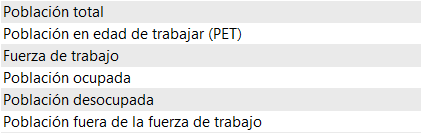

Este documento se encuetra en el siguiente link:

https://www.dane.gov.co/files/operaciones/GEIH/anex-GEIH-mar2024.xlsx



---

**Nota aclaratoria uso de factor de expansión:**

Cada una de las bases contiene un campo con el nombre "fex_c18" el cual almacena  el factor de expansión mensual de cada registro. Este factor de expansión indica el número de personas que representa el entrevistado en la población.

El factor de expansión (fex_c18) se modifica de acuerdo con la información que se necesite:
*   Datos mensuales no se deben hacer cambios (el factor es mensual).
*   Datos trimestrales se debe dividir en 3.
*   Datos semestrales se divide en 6.
*   Información anual se divide en 12.
---



In [ ]:
# Definimos las variables que queremos utilizar de mercado laboral
variables_ml = ['pt', 'pet', 'ft', 'oci', 'dsi', 'fft']

# Creamos un diccionario para almacenar los resultados redondeados de cada variable
results_ml_dict = {}

# Calculamos el resultado para cada variable, lo redondeamos y lo almacenamos en el diccionario
for variable in variables_ml:
    test = (data[variable] * data['fex_c18']).sum() / 1000
    rounded_test = round(test)  # Redondeamos el resultado a 2 decimales
    results_ml_dict[variable] = rounded_test

# Convertimos el diccionario en un DataFrame
results_ml_df = pd.DataFrame.from_dict(results_ml_dict, orient='index', columns=['Result'])

# Mostramos el diccionario con los resultados
results_ml_df.head()

In [ ]:
#Total de registros (filas del DataFrame)
len(data)

In [ ]:
#Tamaño (filas, columnas)
data.shape

In [ ]:
# Visualización de los tipos de datos de las columnas.
data.dtypes

In [ ]:
# Imprimiendo la primeras filas de la base de datos final
data.head()

In [ ]:
# Imprimiendo la últimas filas de la base de datos final
data.tail()

## **3. Pequeña limpieza de datos.**


Mirando la columna relacionada con las variable de sexo.

**Consideraciones de la variable p3271:**


---


La pregunta asociada es: ¿Cuál fue su sexo al nacer?
Las categorías de los valores son:

    1 Masculino
    2 Femenino

In [ ]:
# Obtener la frecuencia de los valores y el tipo de datos de la columna
frecuencia_valores = data['p3271'].value_counts()

# Mostrar la frecuencia de los valores
print("Frecuencia de los valores de la columna:")
print(frecuencia_valores)

In [ ]:
# Mirando si el total de personas tienen observaciones para la variable de sexo
suma_sexo = 37854+ 32865
print(suma_sexo)
data['pt'].value_counts()

In [ ]:
# Renombrando columna asociada a p3271 en el DataFrame
data.rename(columns={'p3271': 'sexo'}, inplace=True)

In [ ]:
# Comprobando el cambio de nombre de la columna
print(f"¿La columna 'sexo' se encuentra en el dataframe? = {'sexo' in data.columns}")
print(f"¿La columna 'p3271' se encuentra en el dataframe? = {'p3271' in data.columns}")

In [ ]:
# Veamos una parte de la columna
data.iloc[:10][["sexo"]]

In [ ]:
# Modificar los valores de la columna: 1 -> 0 (Masculino), 2 -> 1 (Femenino)
data['sexo'] = data['sexo'].map({1: 0, 2: 1})

In [ ]:
data['sexo'].head()

In [ ]:
# Etiquetar los valores de la columna: 0 -> 'Masculino', 1 -> 'Femenino'
data['sexo'] = data['sexo'].map({0: 'Masculino', 1: 'Femenino'})

In [ ]:
# Agrupar por 'sexo' y calcular la suma ponderada usando el factor de expansión
tabla = data.groupby('sexo').apply(lambda x: (x['fex_c18']).sum()/1000).reset_index(name='suma_ponderada')
tabla


**Ejercicio:**


---


Con base en los que hemos hecho con la variable de sexo, haz este proceso con la variable "p6040" que es la variable asociada a la pregunta ¿Cuántos años cumplidos tiene … ?


---

*Pistas:*
1. Utiliza el método value_counts() para obtener la frecuencia de los valores de la columna 'respuesta'.
2. Renombra la columna p6040, por edad.




## **4. Creación de variables de Cuidado**







**Demanda de cuidado**

---



La demanda de cuidado se refiere a la necesidad de atención y asistencia en diversas etapas de la vida debido a circunstancias como discapacidad, enfermedad o envejecimiento. Esta demanda involucra la interacción entre quien requiere cuidado y quien lo brinda, generando cambios en sus condiciones (DANE, 2023).

En términos de demanda de cuidado, es crucial definir categorías de población que requieren atención específica, como la primera infancia (0-4 años), infancia (5-9 años), adolescencia (10-14 años), personas mayores de 65 años en el hogar, y personas con discapacidad en el hogar. Estas variables permiten identificar y cuantificar los diferentes grupos demográficos que necesitan cuidados.


**Población que demanda cuidado definida a través de la variable edad.**

In [ ]:
# Personas menores de 5 años
data.loc[:,"primera_infancia"] = data["edad"].apply(lambda x : 1 if x < 5 else 0)
# Verificamos si la variable está bien construida //Frecuencia
data['primera_infancia'].value_counts()

**Divipola**

La codificación de la División Político Administrativa (Divipola) es un número que identifica de manera única a todos los municipios y departamentos de Colombia. Un municipio tiene un código de 5 dígitos donde los primeros 2 indican el departamento y los últimos 3 el municipio. Estos son algunos ejemplos:

* El código de Antioquia es "05" y el código del municipio de Amalfi es "031" por lo que el Divipola completo es "05031"

In [ ]:
# Agrupar por 'area' y calcular la suma ponderada
tabla_2 = data.groupby('area').apply(lambda x: (x['primera_infancia'] *x['fex_c18']).sum()).reset_index(name='suma_ponderada')
# Filtrar por área igual a 5
tabla_2 = tabla_2[tabla_2['area'] == 5]
tabla_2


**Ejercicio adicional:**


---


Con base en los que hemos hecho con la variable de población menor a 5 años crea las variables de infancia (5-9 años), adolescencia (10-14 años), y de personas mayores de 65 años


---

*Pistas:*
1. Utiliza el método apply() para crear la variable si cumple la condición de la edad.
2. Verifica que esté bien construida (en tus variables deben existir unos y ceros).




**Población que con discapacidad definida a través de las preguntas del grupo de Washington adaptadas a Colombia .**


Dada su condición física y mental, en su vida diaria tiene dificultades para realizar las siguientes actividades:​

        1. No puede hacerlo​

        2. Sí, con mucha dificultad​

        3. Sí, con alguna dificultad​

        4. Sin dificultad​

​


---
**Nota**  
Se identifican como personas en condición de discapacidad quienes reportan los ​dos primeros niveles de dificultad: **​No puede hacerlo** y **​Sí con mucha Dificultad**​ en al menos una de las actividades descritas.

---


+ **p1906s1:** a. ¿Oír, aún con audífonos medicados?
+ **p1906s2:** b. ¿Hablar  o conversar?
+ **p1906s3:** c. ¿Ver, aún usando lentes o gafas?
+ **p1906s4:** d. ¿Mover el cuerpo, caminar o subir y bajar escaleras?
+ **p1906s5:** e. ¿Agarrar o mover objetos con las manos?
+ **p1906s6:** f. ¿Entender, aprender, recordar o tomar decisiones por si mismo/a?
+ **p1906s7:** g. ¿Comer, vestirse o bañarse por si mismo (a)?
+ **p1906s8:** h. ¿Relacionarse o interactuar con las demás personas?



Creación de variable de personas en condición de discapacidad, relacionada con las limitaciones en el movimiento corporal

**P1906S4:** Dada su condición física y mental, en su vida diaria tiene dificultades para realizar las siguientes actividades:  d. ¿Mover el cuerpo, caminar o subir y bajar escaleras?.


In [ ]:
# Personas en condición de discapacidad: Limitaciones en el movimiento corporal
data.loc[:,"no_mov_corp"] = data["p1906s4"].apply(lambda x : 1 if (x == 1 or x==2)  else 0)
# Selecciona las filas en las que el valor de "no_mov_corp" es igual a 1 y muestra las columnas "p1906s4" y "no_mov_corp". frecuencia
data["no_mov_corp"].value_counts()


**Ejercicio adicional:**


---


Con base en los que hemos hecho con la variable de población con discapacidad realacionada con las limitaciones en el moviemitno corporal. Crea cada una de las variables faltantes enunciadas en la parte de arriba y crea una variable final que relacione todas estas condiciones que se llame discapacidad.

Con base en esto, haz una verificación de la construcción de las variables y realiza una tabla que te permita conocer la población discapacitada a nivel del área metropolitana de Bogotá.


---

*Pistas:*
1. Utiliza el método apply() para crear la variable.
2. Verifica que esté bien construida (en tus variables deben existir unos y ceros).
3. Utiliza el método groupby y los factores de expansión para conocer las personas con discapacidad en Bogotá.




**Oferta de cuidado**

---

**Clasificación industrial internacional uniforme de todas las actividades económicas (CIIU)** Es una clasificación de actividades económicas por procesos productivos que clasifica unidades estadísticas con base en su actividad económica principal [DANE(2024)](https://www.dane.gov.co/index.php/sistema-estadistico-nacional-sen/normas-y-estandares/nomenclaturas-y-clasificaciones/clasificaciones/clasificacion-industrial-internacional-uniforme-de-todas-las-actividades-economicas-ciiu#:~:text=Actividades%20Econ%C3%B3micas%20(CIIU)-,Clasificaci%C3%B3n%20industrial%20internacional%20uniforme%20de%20todas%20las%20actividades%20econ%C3%B3micas%20(CIIU,en%20su%20actividad%20econ%C3%B3mica%20principal.)

---
***Sector de cuidado (cuidado remunerado):***

**CUIDADO DIRECTO**

**Servicios de cuidado a grupos determinados**
+ 8511 Educación de la primera infancia
+ 8512 Educación preescolar
+ 8513 Educación básica primaria
+ 8720 Actividades de atención residencial, para el cuidado de pacientes con retardo mental, enfermedad mental y consumo de sustancias psicoactivas
+ 8730 Actividades de atención en instituciones para el cuidado de personas mayores y/o discapacitadas
+ 8810 Actividades de asistencia social sin alojamiento para personas mayores y discapacitadas

**Salud humana y asistencia social**
+ 8610 Actividades de hospitales y clínicas, con internación
+ 8621 Actividades de la práctica médica, sin internación
+ 8691 Actividades de apoyo diagnóstico
+ 8692 Actividades de apoyo terapéutico
+ 8699 Otras actividades de atención de la salud humana
+ 8710 Actividades de atención residencial medicalizada de tipo general
+ 8790 Otras actividades de atención en instituciones con alojamiento
+ 8890 Otras actividades de asistencia social sin alojamiento


---
**CUIDADO INDIRECTO**

**Servicio doméstico**
+ 9700 Actividades de los hogares individuales como empleadores de personal doméstico

**Servicios de comidas preparadas**
+ 5611 Expendio a la mesa de comidas preparadas
+ 5612 Expendio por autoservicio de comidas preparadas
+ 5613 Expendio de comidas preparadas en cafeterías
+ 5619 Otros tipos de expendio de comidas preparadas n.c.p.

**Lavado de ropa**
+ 9601 Lavado y limpieza, incluso la limpieza en seco, de productos textiles y de pie

---
**OTROS**

**Peluquería**
+ 9602 Peluquería y otros tratamientos de belleza


**Sector de cuidado: Cuidado Directo**


---


Asignar un valor que indica si una persona trabaja en el sector de cuidado directo- específicamente en servicio a grupos determinados.

**Servicios de cuidado a grupos determinados**

+ 8511 Educación de la primera infancia
+ 8512 Educación preescolar
+ 8513 Educación básica primaria
+ 8720 Actividades de atención residencial, para el cuidado de pacientes con retardo mental, enfermedad mental y consumo de sustancias psicoactivas
+ 8730 Actividades de atención en instituciones para el cuidado de personas mayores y/o discapacitadas
+ 8810 Actividades de asistencia social sin alojamiento para personas mayores y discapacitadas

In [ ]:
# Lista de códigos CIIU a comparar
rama4d_r4 =[8511,8512, 8513, 8720, 8730, 8810]
# Creando nueva columna de 1 y 0 de servicios de cuidado a grupos determinados
data['cuidado_grp_det'] = data['rama4d_r4'].isin(rama4d_r4).astype(int)
# Filtra el DataFrame `data` para obtener sólo las filas donde la columna "cuidado_grp_det" es igual a 1
# Luego selecciona y muestra las columnas "rama4d_r4" y "cuidado_grp_det" de esas filas
data[data["cuidado_grp_det"]==1][["rama4d_r4","cuidado_grp_det"]].value_counts()

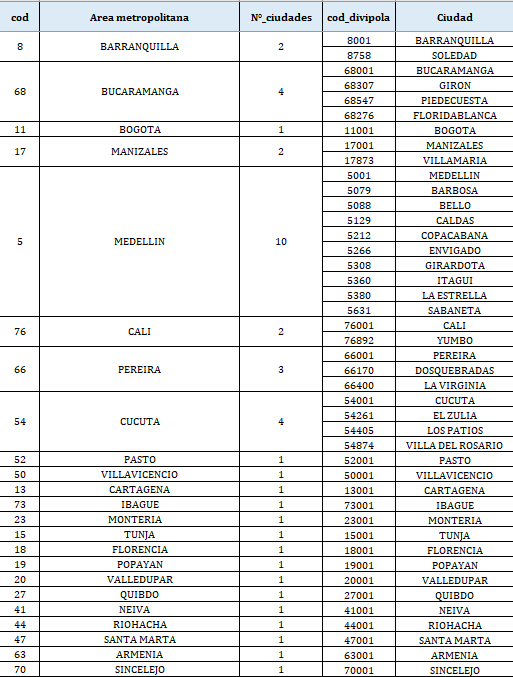

In [ ]:
# Filtra el DataFrame `data` para obtener sólo las filas donde la columna "cuidado_grp_det" es igual a 1
servicios_area = data[data["cuidado_grp_det"]==1][["area","rama4d_r4","cuidado_grp_det","fex_c18"]]

# Crea una nueva columna "cuidado_grp_det_fex" en el DataFrame `servicios_area`
servicios_area.loc[:,"cuidado_grp_det_fex"] = servicios_area["cuidado_grp_det"] * servicios_area["fex_c18"]

# Luego, se selecciona la columna "cuidado_grp_det_fex" y se calcula la suma de sus valores para cada area
servicios_area.groupby(["area"], as_index = False)[["cuidado_grp_det_fex"]].sum()


**Ejercicio adicional:**


---


Con base en los que hemos hecho con la variable de asociada al cuidado de grupos determinados, crea las subcategorías cuidado restantes. Finalmente, crea un variable que realacione el sector completo de cuidado remunerado.

Con base en esto, haz una verificación de la construcción de las variables y realiza una tabla que te permita conocer las personas en el sector en las 23 áreas metropolitanas.

---




**Cuidado  no remunerado**


---

**CUIDADO DIRECTO**

+ p3079: Cuidar niñas o niños menores de 5 años que no estén enfermos ni en condición de discapacidad
+ p3081: Cuidar personas enfermas, en condición de discapacidad o adultos mayores
+ p3082: Ayudar a personas con tareas o trabajos escolares


---

**CUIDADO INDIRECTO**

+ p3076: Cocinar, lavar los platos, poner la mesa
+ p3077: Lavar, colgar, planchar la ropa, reparar ropa
+ p3078: Limpiar o arreglar la casa, tender las camas, barrer trapear, sacar la basura
+ p3089: Preparar conservas, quesos o embutidos
+ p3091: Elaborar prendas de vestir
---

**OTROS**
+ Hacer de manera voluntaria, reparaciones, labores de limpieza o algún  trabajo en beneficio de su barrio, vereda, centro poblado o comunidad

    **p3098: p3098s1 -días p3098s2 - horas día**
+ Realizar actividades de voluntariado (sin que le pagaran) a través de 	una institución sin ánimo de lucro como: damas grises de la Cruz Roja, un techo para mi país, entre otros

  **p3099: p3099s1- días p3099s2- horas día**

+  Participar en reuniones de asociaciones de padres, sindicatos, partidos 	políticos, juntas de acción comunal

  **p3101: p3101s1- días p3101s2- horas día**







**Tiempos de cuidado**


---


Asignar un valor que indica si se dedica tiempo a una persona que requiere cuidado: personas enfermas, en condición de discapacidad o adultos mayores en el hogar


**p3081s1:**  Cuidar personas enfermas, en condición de discapacidad o adultos mayores en: a. Su hogar? (1: Si; 2:No)

In [ ]:
#Acceso a la columna p3081s1
data["p3081s1"]

**p3081s1a1**: Cuidar personas enfermas, en condición de discapacidad o adultos mayores en: Días

In [ ]:
# Obtiene los valores únicos en la columna "p3081s1a2", que representan las horas por día
data["p3081s1a2"].unique()  # Horas por día

In [ ]:
# Obtiene los valores únicos en la columna "p3081s1a1", que representan los días de la semana
data["p3081s1a1"].unique()  # Días de la semana

In [ ]:
# Calcula la columna "horas_semana_cuid_may" basada en condiciones específicas de otras columnas
data["horas_semana_cuid_may"] = data.apply(lambda x: x["p3081s1a1"] * x["p3081s1a2"] if (x["p3081s1"] == 1) else 0, axis=1)

In [ ]:
# Filtra las filas donde "horas_semana_cuid_may" es diferente de cero y selecciona columnas específicas para mostrar
filtered_data = data[data["horas_semana_cuid_may"] != 0][["p3081s1a1", "p3081s1a2", "p3081s1", "horas_semana_cuid_may", "sexo"]]
filtered_data

In [ ]:
# Calcular el promedio de las horas semanales de cuidado mayoritariamente
horas_promedio_cuidado = filtered_data["horas_semana_cuid_may"].mean()
horas_promedio_cuidado

In [ ]:
# Muestra información acerca de las columnas "horas_semana_cuid_may" y "sexo"
data[["horas_semana_cuid_may",'sexo']].info()

In [ ]:
# Agrupar por sexo y calcular el promedio de horas semanales de cuidado a mayores
tabla_promedio_sexo = filtered_data.groupby('sexo')['horas_semana_cuid_may'].mean()

# Mostrar la tabla resultante
tabla_promedio_sexo

## **5. Algunas estadísticas descriptivas**

En esta sección, nos sumergiremos en un análisis exploratorio que tiene como objetivo abordar preguntas de interés y validar hipótesis relevantes. Exploraremos diversas estadísticas descriptivas para comprender mejor nuestros datos y obtener insights valiosos que guíen nuestro análisis más detallado.

In [ ]:
# Estadísticos de las columnas numéricas
data.describe()

In [ ]:
# Visualización de un subconjunto de columnas
data[
    ['edad',
     'inglabo',
     'p6800',
     'p6850'
      ]].describe()

In [ ]:
# Filtrar el DataFrame donde servicios_area es igual a 1 y luego mostrar las estadísticas descriptivas
data[data['cuidado_grp_det'] == 1][['edad', 'inglabo', 'p6800', 'p6850']].describe()
